In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [4]:
import pandas as pd

# The dataset was already fetched as 'breast_cancer_wisconsin_diagnostic'
# X and y are already available from the previous cell.
# Concatenate X and y to create the full DataFrame
breast_cancer_df = pd.concat([X, y], axis=1)

# The column names can be set after concatenation if needed,
# but ucimlrepo already provides meaningful names for X and y.
# For example, to align with the 'column_names' list provided in the original cell,
# we can rename columns, but this isn't strictly necessary if X and y already have good names.
# Let's inspect the columns of the new breast_cancer_df to confirm.
print(breast_cancer_df.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

In [5]:
# Count samples of each class
unique_classes, counts = np.unique(breast_cancer_df["Diagnosis"], return_counts=True)

# Display the results
for cl, count in zip(unique_classes, counts):
  print(f'Class {cl}: {count} samples')

Class B: 357 samples
Class M: 212 samples


In [6]:
num_samples = breast_cancer_df.shape[0]
num_features = breast_cancer_df.shape[1]-2
num_classes = len(unique_classes)
print("Number of samples is", num_samples, "and number of features is", num_features, "and number of classes is", num_classes)

Number of samples is 569 and number of features is 29 and number of classes is 2


In [7]:
# Create a mapping dictionary in order to convert class names to numerical values
class_mapping = {'B': 0, 'M': 1}

# Apply the mapping to the 'class' column, add a new column that is numerical encoded
breast_cancer_df['class_encoded'] = breast_cancer_df['Diagnosis'].map(class_mapping)

In [8]:
breast_cancer_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis,class_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1


In [9]:
breast_cancer_df = breast_cancer_df.drop("Diagnosis", axis=1) # Drop Diagnosis column

In [10]:
# Extract features and convert it to a NumPy array
x_data = breast_cancer_df.iloc[:, :num_features].values
# Extract the last column (labels) and convert it to a NumPy array
y_data = breast_cancer_df.iloc[:, -1].values # labels must have numerical values

In [11]:
print(x_data.shape)
print(y_data.shape)

(569, 29)
(569,)


Α

In [12]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Define RANDOM_SEED for reproducibility
RANDOM_SEED = 42

# Split 70% Training - 30% Testing
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=RANDOM_SEED)

# Print the sizes
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 398
Size of X_test: 171
Size of y_train: 398
Size of y_test: 171


Β

In [14]:
# Function to simulate missing values
def introduce_missing_values(X: np.ndarray, percentage: float):
    missing_mask = np.random.rand(*X.shape) < percentage
    X_missing = X.copy()
    X_missing[missing_mask] = np.nan
    return X_missing

np.random.seed(RANDOM_SEED)
missing_persentage = 0.10 # 10% missing values
X_train_missing = introduce_missing_values(X_train, missing_persentage) # Introduce missing values to the training set

print("Missing values are 10% of the training data.")
print("Missing values for each feature are")
print(np.sum(np.isnan(X_train_missing), axis=0))

Missing values are 10% of the training data.
Missing values for each feature are
[42 45 35 42 42 52 39 36 49 36 41 37 44 42 53 41 36 31 37 48 51 31 36 38
 39 31 42 34 46]


In [15]:
nan_counts = np.sum(np.isnan(X_train_missing))

print("Total number of values in training set is:", num_features*X_train.shape[0])
print("Total number of missing values is:", nan_counts)
print(f"Percentage of missing values in training set is: {round(nan_counts*100 / (num_features*X_train.shape[0]), 2)}%")

Total number of values in training set is: 11542
Total number of missing values is: 1176
Percentage of missing values in training set is: 10.19%


In [16]:
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the tree classifier is 94.74%


In [17]:
# descision tree classifier with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 92.98%


Γ

Με τα ίδια training και test sets να εκπαιδεύσετε ένα random forest (RF) με 100 ταξινομητές
μέγιστου βάθους 3, χρησιμοποιώντας 5 features ανά δένδρο χωρίς bootstrapping των training
δεδομένων. Να υπολογίσετε την ακρίβεια πρόβλεψης του RF στο test set

In [19]:
# Implement a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=42)
rf_classifier.fit(X_train_missing, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Train random forest with {missing_persentage*100:.1f}% missing values. Accuracy {accuracy_rf*100:.1f}%")

Train random forest with 10.0% missing values. Accuracy 96.5%


θα προσπαθησω να την ανεβασω λιγο την αποδοση

In [20]:
# Random Forest classifier with max depth 3, 100 trees, without missing values
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=RANDOM_SEED)

# Train the Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the random forest classifier is 96.49%


In [21]:
# Random Forest classifier with max depth 3, 100 trees, with missing values -> not supported from sklearn
num_trees = 100
predictions = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)



ensemble_predictions = np.mean(predictions, axis=0) > 0.5

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


Δ

Υπολογίστε το feature importance για τον δενδρικό ταξινομητή και το RF. Σχολιάστε τα μέχρι
τώρα αποτελέσματα και τις διαφορές που παρατηρείτε.

In [30]:
# Decision tree with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 92.98%


In [32]:
# Calculate feature importance for the tree
feature_importance = tree_classifier.feature_importances_

# Get the feature names from the DataFrame used for training
# X_train was created from breast_cancer_df.iloc[:, :num_features]
feature_names_list = breast_cancer_df.columns[:num_features]

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {feature_names_list[i]:25s} {importance:.4f}")

Features                    Importance
 1 - radius1                   0.0000
 2 - texture1                  0.0318
 3 - perimeter1                0.0309
 4 - area1                     0.0000
 5 - smoothness1               0.0107
 6 - compactness1              0.0000
 7 - concavity1                0.0000
 8 - concave_points1           0.0000
 9 - symmetry1                 0.0000
10 - fractal_dimension1        0.0000
11 - radius2                   0.0000
12 - texture2                  0.0108
13 - perimeter2                0.0000
14 - area2                     0.0225
15 - smoothness2               0.0000
16 - compactness2              0.0083
17 - concavity2                0.0000
18 - concave_points2           0.0000
19 - symmetry2                 0.0000
20 - fractal_dimension2        0.0193
21 - radius3                   0.1935
22 - texture3                  0.0011
23 - perimeter3                0.0160
24 - area3                     0.0000
25 - smoothness3               0.0000
26 - compac

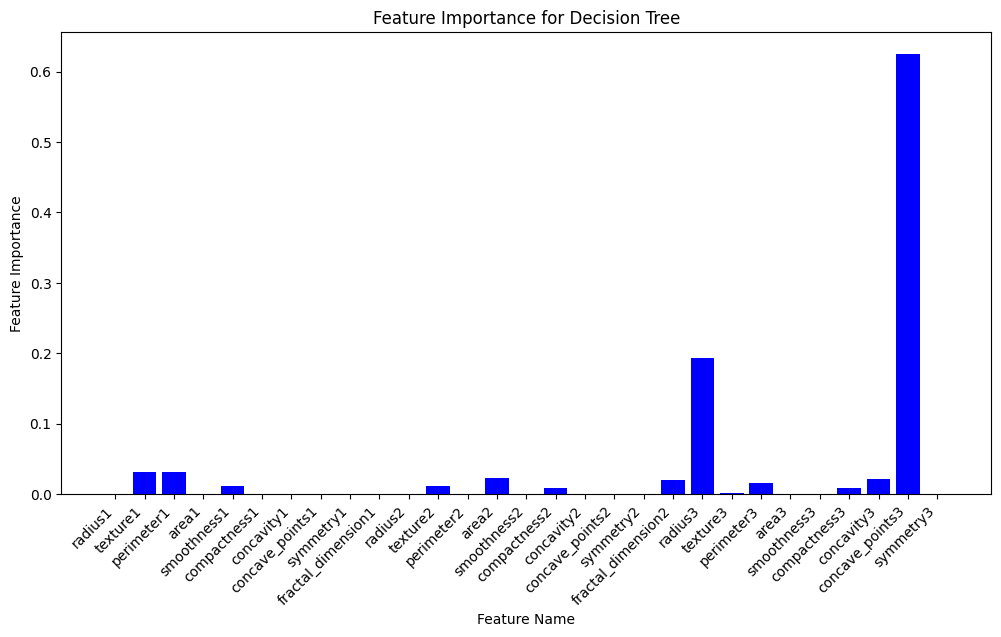

In [34]:
#  plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(range(len(feature_importance)), feature_names_list, rotation=45, ha='right', fontsize=10)
plt.show()

In [35]:
num_trees = 100
predictions = []
feature_importances = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  # Make predictions
  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)

  # Feature importance
  feature_importance = tree_classifier.feature_importances_
  feature_importances.append(feature_importance)


# Combine predictions using majority voting
ensemble_predictions = np.mean(predictions, axis=0) > 0.5

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


In [37]:
feature_importance = np.nanmean(feature_importances, axis=0) # if there is nan value ignore it

# Get the feature names from the DataFrame used for training, as was done for the Decision Tree
feature_names_list = breast_cancer_df.columns[:num_features]

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {feature_names_list[i]:25s} {importance:.4f}")

Features                    Importance
 1 - radius1                   0.0382
 2 - texture1                  0.0072
 3 - perimeter1                0.0879
 4 - area1                     0.0803
 5 - smoothness1               0.0019
 6 - compactness1              0.0006
 7 - concavity1                0.0760
 8 - concave_points1           0.1284
 9 - symmetry1                 0.0004
10 - fractal_dimension1        0.0017
11 - radius2                   0.0198
12 - texture2                  0.0020
13 - perimeter2                0.0050
14 - area2                     0.0326
15 - smoothness2               0.0009
16 - compactness2              0.0005
17 - concavity2                0.0030
18 - concave_points2           0.0013
19 - symmetry2                 0.0022
20 - fractal_dimension2        0.0042
21 - radius3                   0.1067
22 - texture3                  0.0138
23 - perimeter3                0.0718
24 - area3                     0.0944
25 - smoothness3               0.0037
26 - compac

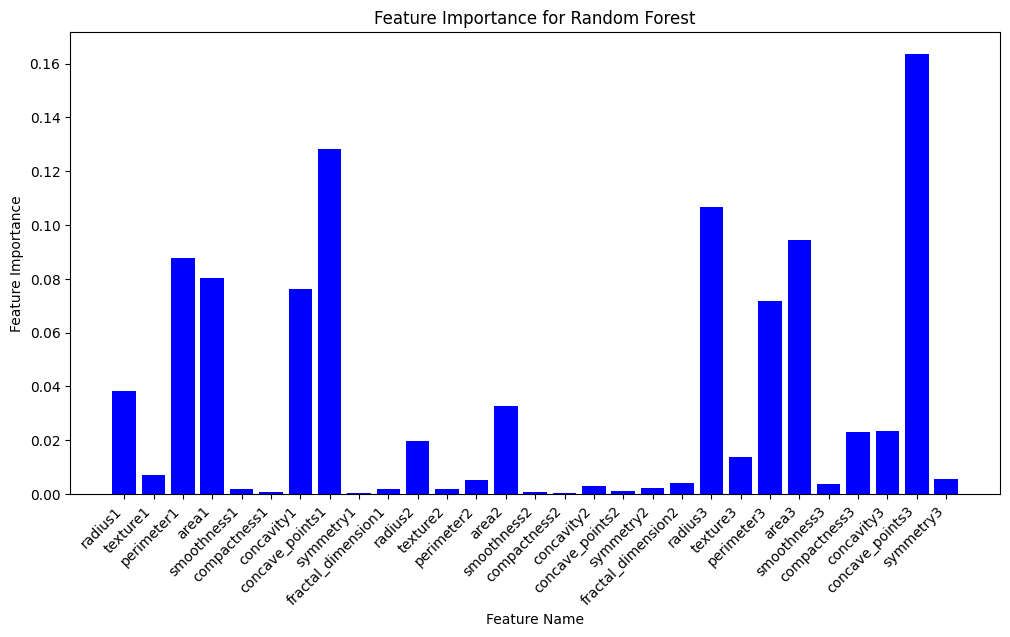

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(range(len(feature_importance)), feature_names_list, rotation=45, ha='right', fontsize=10)
plt.show()

Παρατηρούμε ότι στον tree classifier τα σημαντικά χαρακτηριστικά είναι λίγα (τα πιο σημαντικά χαρακτηριστικά ). Στο RF τα σημαντικά χαρακτηριστικά είναι πολύ
περισσότερα,αλλά οι τιμές σημαντικότητας του κάθε χαρακτηριστικού είναι
μικρότερες από τις τιμές του tree classifier. . Οπότε, στο RF δίνεται βαρύτητα σε πολλά
χαρακτηριστικά, δηλαδή διερευνώνται πολλές περιοχές λύσεων, σε αντίθεση με τον tree
classifier που χρησιμοποιεί μόνο ένα πολύ μικρό υποσύνολο των χαρακτηριστικών. Για αυτό
το λόγο, όπως αναφέραμε και στο ερώτημα Γ, ο RF σχεδόν πάντα καταλήγει σε καλύτερη
λύση.

Ε

Να εκπαιδεύσετε το ίδιο RF για μεταβλητό ποσοστό missing values (0% έως 80% ανά 10%)
και για κάθε forest να υπολογίσετε το classification accuracy εισάγοντας στο test set
μεταβλητό ποσοστό missing values (0% έως 80% ανά 10%). Απεικονίστε κατάλληλα τη
συνολική συμπεριφορά της ακρίβειας του RF ταξινομητή σε σχέση με το ποσοστό missing
values. Σχολιάστε την αντοχή του random forest στα missing data, τόσο στο training όσο και
στο testing. Σε ποιο από τα δύο είδη missing data είναι περισσότερο ευαίσθητος?
